In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df=sns.load_dataset('titanic') 

In [3]:
X=df[['pclass','sex','age','sibsp','parch','fare']]
y=df['survived']

In [4]:
X=pd.get_dummies(X, columns=['sex'])

In [5]:
X.isnull().sum()

pclass          0
age           177
sibsp           0
parch           0
fare            0
sex_female      0
sex_male        0
dtype: int64

In [6]:
X['age'].fillna(X['age'].mean(), inplace=True)

In [7]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [8]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
y_pred=model.predict(X_test)    

In [10]:
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.7932960893854749


In [11]:
# precision, recall, f1-score
from sklearn.metrics import precision_score, recall_score, f1_score



These are metrics used to evaluate the performance of classification models:

1. **Precision Score**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is also called Positive Predictive Value. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.

2. **Recall Score**: Recall (Sensitivity) - the ratio of correctly predicted positive observations to the all observations in actual class. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.

3. **F1 Score**: The F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. It is usually more useful than accuracy, especially if you have an uneven class distribution. 

Here's how you can calculate these scores in Python:





In this code, `y_true` and `y_pred` should be 1-D arrays or lists of the same length, containing the true and predicted class labels, respectively.

In [12]:

precision_score(y_test, y_pred)



0.7368421052631579

In [13]:

recall_score(y_test, y_pred)

0.65625

In [14]:
f1_score(y_test, y_pred)
# average of upper two.


0.6942148760330578

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. It's a 2x2 matrix used for binary classification problems. Here's how it looks:



In [15]:
              Predicted: No   Predicted: Yes
Actual: No       TN              FP
Actual: Yes      FN              TP

SyntaxError: invalid syntax (1080327759.py, line 1)



- **True Positives (TP)**: These are cases in which we predicted yes (the person has the condition), and they do have the condition.
- **True Negatives (TN)**: We predicted no, and they don't have the condition.
- **False Positives (FP)**: We predicted yes, but they don't actually have the condition. (Also known as a "Type I error.")
- **False Negatives (FN)**: We predicted no, but they actually do have the condition. (Also known as a "Type II error.")

This matrix is extremely useful for measuring Recall, Precision, Specificity, Accuracy and most importantly AUC-ROC Curve.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[92, 25],
       [16, 46]], dtype=int64)

<Axes: >

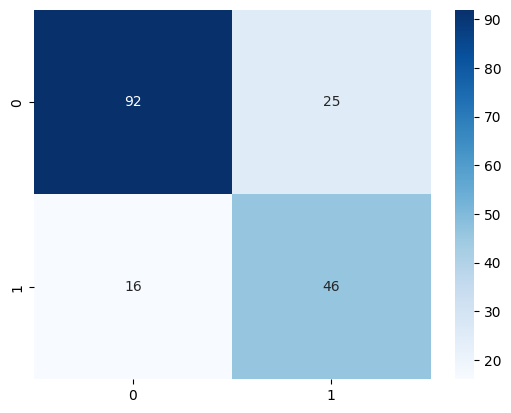

In [ ]:
cm=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
cm

The code you provided is using the seaborn library's heatmap function to visualize a confusion matrix for a classification model.

Here's a breakdown:

1. `confusion_matrix(y_test, y_pred)`: This is a function from sklearn.metrics that generates a confusion matrix. `y_test` are the true labels and `y_pred` are the predicted labels from the model.

2. `sns.heatmap()`: This is a function from the seaborn library that generates a heatmap. A heatmap is a graphical representation of data where individual values are represented as colors.

3. `annot=True`: This argument allows the values of the confusion matrix to be written on the heatmap.

4. `cmap='Blues'`: This argument sets the color map of the heatmap to different shades of blue.

The resulting heatmap provides a visual representation of the performance of the classification model. The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

K-Nearest Neighbors (KNN) is a type of instance-based learning algorithm used for both classification and regression problems. 

The idea behind KNN is simple: it assumes that similar things exist in close proximity. In other words, similar things are near to each other. 

When a prediction is required for an unseen data instance, the KNN algorithm will search through the training dataset for the k-most similar instances (the neighbors) and summarizes the output variable for those k-instances. For regression problems, this might be the mean output variable. For classification problems this might be the mode (or most common) class value.

To determine which of the instances in the training dataset are most similar to a new input, a distance measure is used. For real-valued input variables, the most popular distance measure is Euclidean distance. Other popular measures include: Manhattan, Minkowski and Hamming distance.

The 'k' in K-Nearest Neighbors is a tunable parameter, and it refers to the number of nearest neighbors that will vote on the predicted output.

Accuracy:  0.7877094972067039
Precision:  0.7
Recall:  0.6774193548387096
F1-Score:  0.6885245901639343


<Axes: >

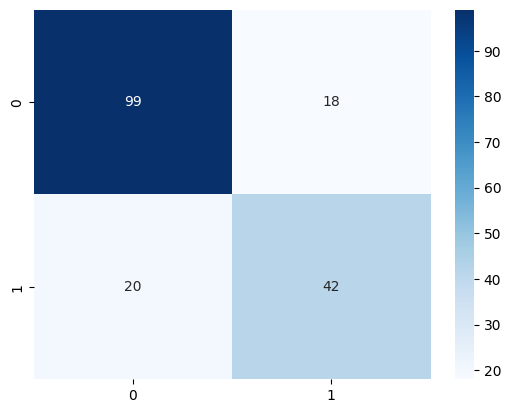

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')


Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple algorithms to solve a particular problem.

Random Forest is a collection of decision trees that are combined together to get a more accurate and stable prediction. Each individual tree in the random forest gives out a class prediction and the class with the most votes becomes the model’s prediction.

The fundamental concept behind Random Forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is that a large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

Key features of Random Forest:

1. It reduces overfitting in decision trees and helps to improve the accuracy.
2. It is flexible to both classification and regression problems.
3. It works well with both categorical and continuous values.
4. It automates missing values present in the data.
5. Normalising of data is not required as it uses a rule-based approach.

Accuracy:  0.8324022346368715
Precision:  0.7714285714285715
Recall:  0.7941176470588235
F1-Score:  0.782608695652174


<Axes: >

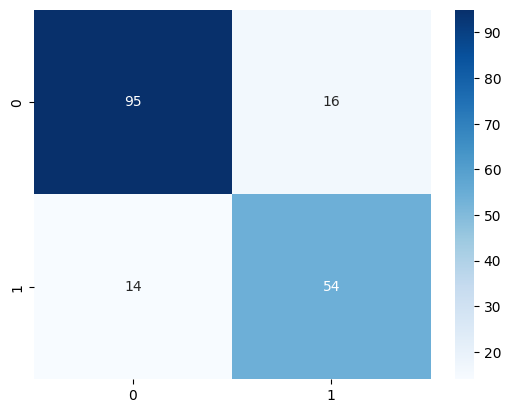

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')



Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression problems, but it is mostly used for classification. 

In the SVM algorithm, we plot each data item in the dataset in an n-dimensional space (where n is the number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyperplane that differentiates the two classes very well.

Key features of SVM:

1. **Support Vectors**: These are the data points that lie closest to the decision surface (or hyperplane). They are the data points most difficult to classify and have a direct bearing on the optimum location of the decision surface.

2. **Hyperplane**: This is a decision plane or space which is divided between a set of objects having different classes.

3. **Margin**: The gap between the two lines on the closest class points is known as margin. The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum marginal hyperplane in the following steps:

   - Generate hyperplanes which segregates the classes in the best way.
   - Select the right hyperplane with the maximum segregation from either nearest data points.

SVM has a technique called the kernel trick which can do high-dimensional and non-linear classification. It's a well-regarded algorithm because of its robustness, accuracy, and ability to handle high-dimensional spaces.

Accuracy:  0.6983240223463687
Precision:  0.7333333333333333
Recall:  0.3235294117647059
F1-Score:  0.4489795918367347


<Axes: >

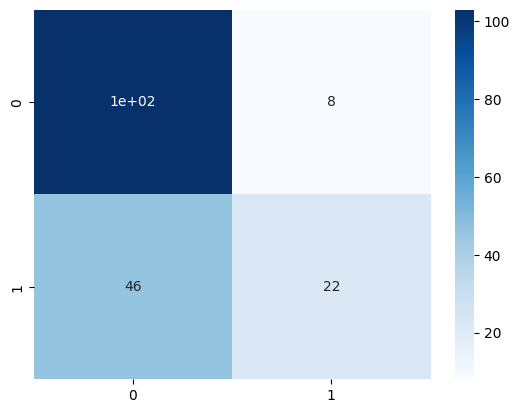

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')


Naive Bayes is a classification technique based on Bayes' Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that a particular fruit is an apple or an orange or a banana and that is why it is known as 'Naive'.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating the posterior probability, P(c|x), from P(c), P(x), and P(x|c). Naive Bayes is highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem.

Here's the formula for Bayes' Theorem:



In [ ]:
P(c|x) = P(x|c) * P(c) / P(x)



Where:
- P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
- P(c) is the prior probability of class.
- P(x|c) is the likelihood which is the probability of predictor given class.
- P(x) is the prior probability of predictor.

Accuracy:  0.8491620111731844
Precision:  0.8360655737704918
Recall:  0.75
F1-Score:  0.7906976744186046


<Axes: >

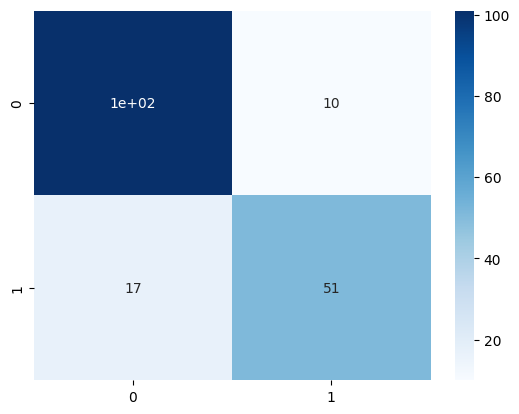

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1-Score: ', f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')



In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import cross_val_score


In [17]:
# define models to be evaluated
models=[KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names=['KNN', 'RF', 'SVC']
#perform k-fold cross validation for each model
k=10
for model, name in zip(models, names):
    cv_scores=cross_val_score(model, X_train, y_train, cv=k)
    print(name, cv_scores)
    print(name, np.mean(cv_scores))
    print('---------------------------')



KNN [0.73611111 0.625      0.70422535 0.70422535 0.70422535 0.71830986
 0.67605634 0.73239437 0.8028169  0.69014085]
KNN 0.7093505477308295
---------------------------
RF [0.80555556 0.77777778 0.73239437 0.84507042 0.83098592 0.85915493
 0.78873239 0.84507042 0.76056338 0.78873239]
RF 0.8034037558685446
---------------------------
SVC [0.69444444 0.66666667 0.64788732 0.63380282 0.66197183 0.69014085
 0.69014085 0.63380282 0.6056338  0.73239437]
SVC 0.6656885758998434
---------------------------


In [ ]:
# random forest has the highest accuracy score.
